In [4]:
import numpy as np

import pandas as pd
pd.set_option('display.precision',5)
pd.set_option('display.max_colwidth',100)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
%matplotlib inline

In [6]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")


In [7]:
train_df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.shape

(60000, 785)

In [9]:
test_df.shape

(10000, 785)

In [10]:
def pixel_mat(row):
    vec = train_df.drop('label', axis=1).iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat

In [11]:
x = np.random.randint(0,42000)
X = pixel_mat(x)
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
X = X[~np.all(X == 0, axis=1)]
X = X[:,~np.all(X == 0, axis=0)]
print(X)

[[ 49 251 233 169 149  83 128  82   0   0   0   0   0   0   0   0]
 [ 27 172 196 209 220 254 254 254 251 210 106  97  72   0   0   0]
 [  0   0   2   4   5   8  25  95 137 169 163 238 246 121   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  19 194 254 141   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 254 241   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22 254 241   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22 254 241   0]
 [  0   0   0   0   0   0  43 225 212 138  82  53  99 255 246  25]
 [  0   0   0   0   0   0  23 135 135 121 148 207 243 254 196   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 195 252  70   0]
 [  0   0   0   0   0   0   0   0   0   0   0  22 245 237   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  27 254 208   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 135 254 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 199 236  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0  97 241 205   0   0 

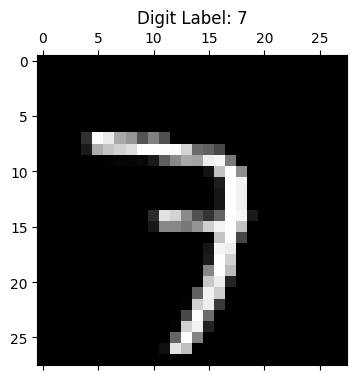

In [13]:
plt.matshow(pixel_mat(x), cmap=plt.cm.gray)
plt.title("Digit Label: %d" % train_df['label'].iloc[x])
plt.show()

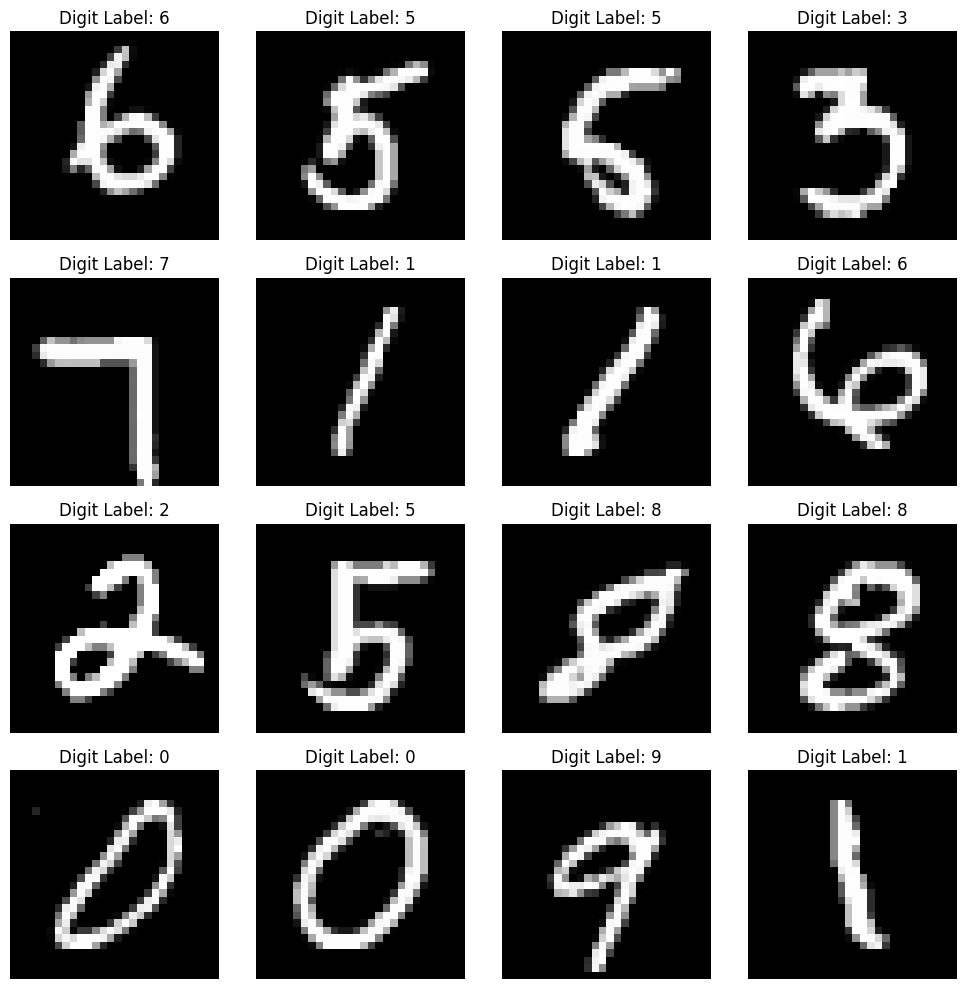

In [14]:
rand_idx = np.random.choice(train_df.index, size=16, replace=False)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Digit Label: %d" % train_df['label'].iloc[rand_idx[i]])
    ax.imshow(pixel_mat(rand_idx[i]), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
plt.tight_layout()   
plt.show()

In [15]:
train_df == 0

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59996,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59997,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59998,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [16]:
(train_df == 0).all()

label    False
1x1       True
1x2       True
1x3       True
1x4       True
         ...  
28x24    False
28x25     True
28x26     True
28x27     True
28x28     True
Length: 785, dtype: bool

In [17]:
train_df.columns[(train_df == 0).all()].tolist()

['1x1',
 '1x2',
 '1x3',
 '1x4',
 '1x5',
 '1x6',
 '1x7',
 '1x8',
 '1x9',
 '1x10',
 '1x11',
 '1x12',
 '1x17',
 '1x18',
 '1x19',
 '1x20',
 '1x21',
 '1x22',
 '1x23',
 '1x24',
 '1x25',
 '1x26',
 '1x27',
 '1x28',
 '2x1',
 '2x2',
 '2x3',
 '2x4',
 '2x25',
 '2x26',
 '2x27',
 '2x28',
 '3x1',
 '3x2',
 '3x27',
 '3x28',
 '4x1',
 '4x2',
 '4x28',
 '5x1',
 '6x1',
 '6x2',
 '7x1',
 '18x1',
 '21x1',
 '24x1',
 '24x2',
 '24x28',
 '25x1',
 '25x2',
 '25x28',
 '26x1',
 '26x2',
 '26x28',
 '27x1',
 '27x2',
 '27x3',
 '27x27',
 '27x28',
 '28x1',
 '28x2',
 '28x3',
 '28x4',
 '28x25',
 '28x26',
 '28x27',
 '28x28']

In [18]:
zero_cols = list(set(train_df.columns[(train_df == 0).all()].tolist() + test_df.columns[(test_df == 0).all()].tolist()))
len(zero_cols)


118

In [19]:
label_df = train_df['label']
label_df

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [20]:
counts_df = label_df.value_counts().sort_index()
counts_df

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: label, dtype: int64

In [21]:
freq_df = label_df.value_counts(normalize=True).sort_index()
freq_df

0    0.09872
1    0.11237
2    0.09930
3    0.10218
4    0.09737
5    0.09035
6    0.09863
7    0.10442
8    0.09752
9    0.09915
Name: label, dtype: float64

In [22]:
print("Mean of digit frequency is: %f, standard deviation is: %f" % (freq_df.mean(), freq_df.std()))


Mean of digit frequency is: 0.100000, standard deviation is: 0.005658


In [23]:
stack_df = train_df.drop('label', axis=1).stack()
stack_df

0      1x1      0
       1x2      0
       1x3      0
       1x4      0
       1x5      0
               ..
59999  28x24    0
       28x25    0
       28x26    0
       28x27    0
       28x28    0
Length: 47040000, dtype: int64

In [24]:
stack_df.value_counts(normalize=True).sort_index()

0      0.80880
1      0.00049
2      0.00072
3      0.00077
4      0.00081
        ...   
251    0.00250
252    0.01390
253    0.03217
254    0.01704
255    0.00668
Length: 256, dtype: float64

In [25]:
intensity_cuts = pd.cut(stack_df.values, 4)
intensity_cuts

[(-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], ..., (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75]]
Length: 47040000
Categories (4, interval[float64, right]): [(-0.255, 63.75] < (63.75, 127.5] < (127.5, 191.25] < (191.25, 255.0]]

In [26]:
pd.value_counts(intensity_cuts, normalize=True).sort_index()

(-0.255, 63.75]    0.84359
(63.75, 127.5]     0.02415
(127.5, 191.25]    0.02633
(191.25, 255.0]    0.10593
dtype: float64

In [28]:
train_df['label'].head(10)


0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: label, dtype: int64

In [29]:
train_df['label'].head(10).values


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [31]:
y_train = train_df['label'].values


In [32]:
train_df.drop(['label'], axis=1).head(10)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
x_train = train_df.drop(['label'], axis=1).values


In [34]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit


In [36]:
validation_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=46)


In [39]:
validation_split.split(x_train, y_train)


<generator object BaseShuffleSplit.split at 0x0000027ACAF69460>

In [40]:
list(validation_split.split(x_train, y_train))


[(array([26518, 55854,  3717, ..., 45432, 37016, 27813], dtype=int64),
  array([58384, 46309, 14542, ..., 29991, 20332, 10336], dtype=int64))]

In [42]:
training_idx, validation_idx = list(validation_split.split(x_train, y_train))[0]


In [43]:
x_training = x_train[training_idx]
y_training = y_train[training_idx]

x_validation = x_train[validation_idx]
y_validation = y_train[validation_idx]

In [44]:
training_df = train_df.iloc[training_idx]
validation_df = train_df.iloc[validation_idx]

In [45]:
tuning_split = StratifiedShuffleSplit(n_splits=1, train_size=0.15, random_state=96)

In [47]:
tune_idx = list(tuning_split.split(x_training, y_training))[0][0]


In [49]:
x_tune = x_training[tune_idx]
y_tune = y_training[tune_idx]

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [52]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state = 32)


In [53]:
from sklearn.model_selection import RandomizedSearchCV


In [54]:
def random_search(clf, param_dist, n_iter_search, predictors, labels):
    rs = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'accuracy',
                                   n_jobs=-1, n_iter=n_iter_search, cv=kfold) 
    start = time()
    rs.fit(predictors, labels)
    print("RandomizedSearchCV took %.2f seconds for %d candidates" 
          " parameter settings." % ((time() - start), n_iter_search))
    report(rs.cv_results_)

In [55]:
from time import time


In [64]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [65]:
import scipy
rf_param =  {'n_estimators': scipy.stats.randint(50,400), 'max_depth': scipy.stats.randint(2,20), 
             'max_features': scipy.stats.randint(15,40)}

In [68]:
from sklearn.model_selection import cross_val_score

def single_search(clf, params, predictors, labels):
    start = time()
    clf_results_df = pd.DataFrame(dtype = 'float64')
    count = 0
    for k, v in params.items():
        for val in v:
            clf.set_params(**{k: val})
            clf_results_df.loc[count, k] = val
            results = cross_val_score(clf, predictors, labels, cv=kfold, scoring = 'accuracy')
            (clf_results_df.loc[count, 'accuracy'], clf_results_df.loc[count, 'std dev']) = \
                (results.mean(), results.std())
            count += 1
    print("single_search took %.2f seconds for %d candidates." % ((time() - start), count))            
    return clf_results_df

In [74]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 31, n_jobs=-1, random_state = 32)
rf_params = {'max_features': np.arange(5, 50, 5).tolist()}


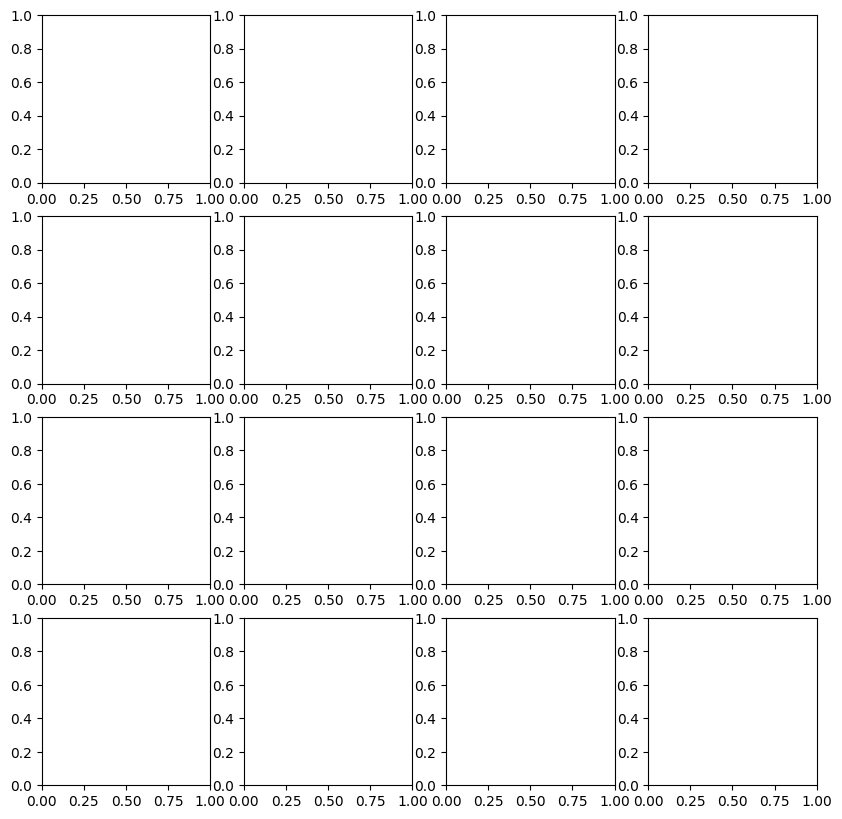

In [119]:

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))



In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [114]:
df = img.imread('final_data.png')

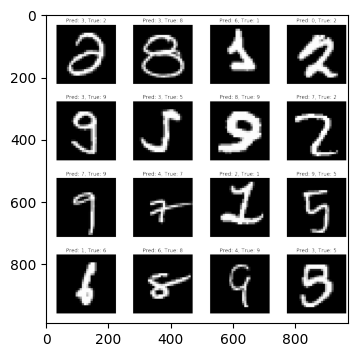

In [115]:
plt.imshow(df)